<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/Lluvias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO 4: ¿LLoverá o no lloverá?

Se importan las librerias necesarias para la resolución del ejercicio

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

Cargamos los datos del dataset

In [44]:
data = pd.read_csv('lluvias.csv', encoding='UTF-8')
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


Resumen de las columnas

In [45]:
data.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

Vemos el formato de cada columna

In [46]:
data.dtypes

DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object

1) Realiza todo el preprocesamiento necesario para poder entrenar el clasificador. (Ojo: las
temperaturas están en grados Celsius.) (1 punto)

Vemos la forma que toma nuestro dataset

In [47]:
data.shape

(25551, 5)

Vemos si existen valores nulos

In [48]:
data.isnull().values.any() 

True

Como hay valores nulos vemos cuantos hay en cada columna

In [49]:
data.isna().sum()  

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

Eliminar las filas con datos nulos ya que el porcentaje de estos es muy bajo

In [50]:
data = data.dropna()


Se mira si hay algún outlier

In [51]:
print(data.describe())

               PRCP          TMAX          TMIN
count  25548.000000  25548.000000  25548.000000
mean       0.106222     59.543056     44.513387
std        0.239031     12.773265      8.893019
min        0.000000      4.000000      0.000000
25%        0.000000     50.000000     38.000000
50%        0.000000     58.000000     45.000000
75%        0.100000     69.000000     52.000000
max        5.020000    103.000000     71.000000


Podemos ver que hay outlieres en la TMAX y en la TMIN ya que hay temperaturas por encima de los 70ºC

Como las temperaturas están en Celsius quitamos las que estén por encima de 50 grados

In [52]:
condicion = data['TMAX'] > 50
filas_a_eliminar=data[condicion]

data = data.drop(filas_a_eliminar.index, axis=0)

In [53]:
condicion2 = data['TMIN'] > 50
filas_a_eliminar2=data[condicion2]


data = data.drop(filas_a_eliminar2.index, axis=0)
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True


Se pasan todas las columnas a numéricas, es decir, cambiamos su formato

In [54]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
data['RAIN'] = label_encoding.fit_transform(data['RAIN'].astype(str))
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1
5,1948-01-06,0.44,48,39,1


In [55]:
from datetime import datetime

data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

data['DATE'] = data['DATE'].dt.strftime("%d%m%Y").astype(int)

data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
1,2011948,0.59,45,36,1
2,3011948,0.42,45,35,1
3,4011948,0.31,45,34,1
4,5011948,0.17,45,32,1
5,6011948,0.44,48,39,1


Clasificamos las temperaturas mínimias y máximas según esta en baja media y alta.

Por otro lado clasificamos las precipitaciones según su valor en poco normal y mucho

In [56]:
data.loc[(data['PRCP'] < 1), 'PRCP_str'] = 'poco'
data.loc[(data['PRCP'] >=1) & (data['PRCP']<=2), 'PRCP_str'] = 'normal'
data.loc[(data['PRCP'] >2), 'PRCP_str'] = 'mucho'

data.loc[(data['TMIN'] < 10), 'TMIN_str'] = 'baja'
data.loc[(data['TMIN'] >=10) & (data['TMIN']<=20), 'TMIN_str'] = 'media'
data.loc[(data['TMIN'] >20), 'TMIN_str'] = 'alta'

data.loc[(data['TMAX'] < 10), 'TMAX_str'] = '_baja'
data.loc[(data['TMAX'] >=10) & (data['TMAX']<=20), 'TMAX_str'] = 'media'
data.loc[(data['TMAX'] >20), 'TMAX_str'] = 'alta'

data.head()

,DATE,PRCP,TMAX,TMIN,RAIN,PRCP_str,TMIN_str,TMAX_str
1,2011948,0.59,45,36,1,poco,alta,alta
2,3011948,0.42,45,35,1,poco,alta,alta
3,4011948,0.31,45,34,1,poco,alta,alta
4,5011948,0.17,45,32,1,poco,alta,alta
5,6011948,0.44,48,39,1,poco,alta,alta


In [57]:
data.dtypes

DATE          int64
PRCP        float64
TMAX          int64
TMIN          int64
RAIN          int64
PRCP_str     object
TMIN_str     object
TMAX_str     object
dtype: object

Graficamos las distintas variables de nuestro dataset (eje x)  respecto a la lluvia (eje y)

Esto nos sirve para ver como influye cada variable en la lluvia 

Gráfica que muestra como dependiendo de la temperatura máxima que haya si llueve o no


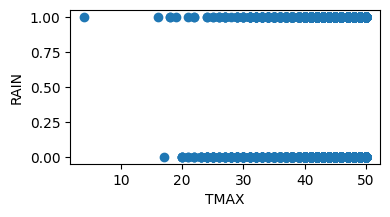

In [58]:
fig, ax = plt.subplots(figsize=(4, 2))

plt.scatter(data['TMAX'], data['RAIN'])

plt.xlabel('TMAX')
plt.ylabel('RAIN');

Se puede ver que está bastante parejo los dias que llovieron con los que no

Por lo tanto no se puede obtener conclusiones a partir de esta únicamente

Gráfica que muestra como dependiendo de la temperatura mínima que haya si llueve o no

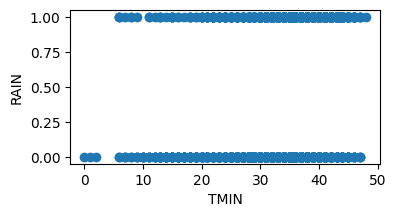

In [59]:
fig, ax = plt.subplots(figsize=(4, 2))

plt.scatter(data['TMIN'], data['RAIN'])

plt.xlabel('TMIN')
plt.ylabel('RAIN');

Se puede ver que está bastante parejo los dias que llovieron con los que no

Por lo tanto no se puede obtener conclusiones a partir de esta únicamente

Gráfica que muestra como dependiendo de la precipitacion que haya si llueve o no

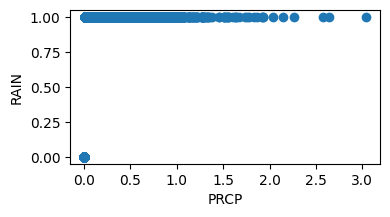

In [60]:
fig, ax = plt.subplots(figsize=(4, 2))

plt.scatter(data['PRCP'], data['RAIN'])

plt.xlabel('PRCP')
plt.ylabel('RAIN');

Se puede ver claramente como la precipitación influye en la lluvia. 

Si hay precipitación llueve y en caso contrario no llueve.

Gráfica que muestra como dependiendo del día que sea si llueve o no

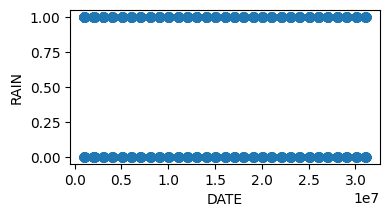

In [61]:
fig, ax = plt.subplots(figsize=(4, 2))

plt.scatter(data['DATE'], data['RAIN'])

plt.xlabel('DATE')
plt.ylabel('RAIN');

Viendo este gráfico se ve que la mitad de los días llueve

Pasamos a mostrar lo mismo que el gráfico de arriba pero en otro formato

In [62]:
pd.crosstab(data['DATE'], data['RAIN']).head()

RAIN,0,1
DATE,,
1011949,1,0
1011950,0,1
1011951,0,1
1011952,1,0
1011953,0,1


Se crea un gráfico que muestra la relación entre las variables

<ipython-input-63-f43c15eae63f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


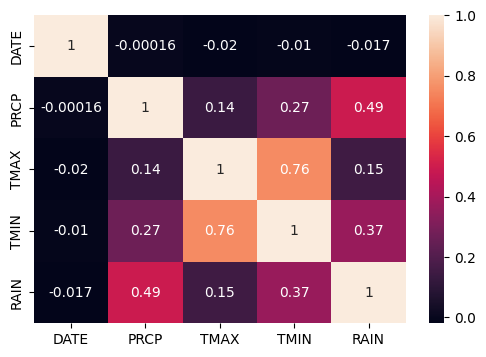

In [63]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4))

data_corr = data.corr()
sns.heatmap(data_corr, annot=True);

Se puede apreciar como el dia no tiene relación con ninguna de las variables y lluvia tiene cierta correlación con la precipitación

Se pasa las columnas a forma boleana para poder clasificar más tarde y se muestra como se han quedado los datos

In [64]:
data=pd.get_dummies(data,columns=['PRCP_str','TMIN_str','TMAX_str'])
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN,PRCP_str_mucho,PRCP_str_normal,PRCP_str_poco,TMIN_str_alta,TMIN_str_baja,TMIN_str_media,TMAX_str__baja,TMAX_str_alta,TMAX_str_media
1,2011948,0.59,45,36,1,0,0,1,1,0,0,0,1,0
2,3011948,0.42,45,35,1,0,0,1,1,0,0,0,1,0
3,4011948,0.31,45,34,1,0,0,1,1,0,0,0,1,0
4,5011948,0.17,45,32,1,0,0,1,1,0,0,0,1,0
5,6011948,0.44,48,39,1,0,0,1,1,0,0,0,1,0


Empezamos el entrenamiento de nuestros datos y la clasificación de estas

Los datos de entrenamiento son 4/5 del total de los datos

In [65]:
from sklearn.model_selection import train_test_split

X = data.drop('RAIN', axis=1)
Y = data['RAIN']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_train.shape, y_train.shape

((5566, 13), (5566,))

Los datos de test son 1/5 del total de los datos

In [66]:
x_test.shape, y_test.shape

((1392, 13), (1392,))

In [67]:
FEATURES = list(data.columns[0:])
result_dict = {}

Creamos funciones para crear el modelo, resumir la claficación y comparar los resultados

In [68]:
def build_model(classifier_fn,name_of_y_col, 
                names_of_x_cols, 
                dataset, 
                test_frac=0.2):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
       
    model = classifier_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)

    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)
    
    pred_results = pd.DataFrame({'y_test': y_test,
                                 'y_pred': y_pred})
    
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    return {'training': train_summary, 
            'test': test_summary,
            'confusion_matrix': model_crosstab}

In [69]:
def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {'accuracy': acc, 
            'precision': prec,
            'recall':recall, 
            'accuracy_count':num_acc}

In [70]:
def compare_results():
    for key in result_dict:
        print('Classification: ', key)

        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])

        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
       
        print()

Se crea el clasificador LDA

In [71]:
def linear_discriminant_fn(x_train, y_train, solver='svd'):
    
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train, y_train)
    
    return model
result_dict['RAIN ~ linear_discriminant_analysis'] = build_model(linear_discriminant_fn,
                                                                    'RAIN',
                                                                     FEATURES,
                                                                    data)

Se crea el clasificador de Regresión Logística

In [72]:
def logistic_fn(x_train, y_train,solver='liblinear'):
    
    model = LogisticRegression(solver=solver)
    model.fit(x_train, y_train)
    
    
    return model
result_dict['RAIN ~ logistic'] = build_model(logistic_fn,
                                              'RAIN',
                                               FEATURES,
                                               data)


Se crea el clasificador Linear SVC

In [73]:
def linear_svc_fn(x_train, y_train, C=1.0, max_iter=1000, tol=1e-3):
    
    model = LinearSVC(C=C, max_iter=max_iter, tol=tol, dual=False)
    model.fit(x_train, y_train) 
    
    return model
result_dict['RAIN ~ linear_svc'] = build_model(linear_svc_fn,
                                                  'RAIN',
                                                   FEATURES,
                                                   data)

Se crea el clasificador Naive Bayes

In [74]:
def naive_bayes_fn(x_train,y_train, priors=None):
    
    model = GaussianNB(priors=priors)
    model.fit(x_train, y_train)
    
    return model
result_dict['survived ~ naive_bayes'] = build_model(naive_bayes_fn,
                                                    'RAIN',
                                                    FEATURES,
                                                    data)


Se analiza cual es el mejor claficador comparandolos entre ellos

In [75]:
compare_results()

Classification:  RAIN ~ linear_discriminant_analysis

Training data
accuracy 0.8210564139417894
precision 0.8712935809710003
recall 0.8164885496183206
accuracy_count 4570

Test data
accuracy 0.8103448275862069
precision 0.865359477124183
recall 0.804374240583232
accuracy_count 1128

Classification:  RAIN ~ logistic

Training data
accuracy 0.5916277398490837
precision 0.5916277398490837
recall 1.0
accuracy_count 3293

Test data
accuracy 0.5783045977011494
precision 0.5783045977011494
recall 1.0
accuracy_count 805

Classification:  RAIN ~ linear_svc

Training data
accuracy 0.5858785483291412
precision 0.5858785483291412
recall 1.0
accuracy_count 3261

Test data
accuracy 0.6012931034482759
precision 0.6012931034482759
recall 1.0
accuracy_count 837

Classification:  survived ~ naive_bayes

Training data
accuracy 0.5912684153790874
precision 0.5912684153790874
recall 1.0
accuracy_count 3291

Test data
accuracy 0.5797413793103449
precision 0.5797413793103449
recall 1.0
accuracy_count 807



El clasifcador que mejor clasifica es el LDA con una precisión de 81% y el peor clasificador es linear svc con una precisión del 58%. 

Creación del modelo donde le metemos los 2 mejores clasificadores (LDA y logistic)

In [76]:
from sklearn import model_selection

models = []

#logistic Regression
models.append(('Logistic', LogisticRegression(solver='liblinear')))

# LDA (linear discriminant analisis) classifier
models.append(('LDA', LinearDiscriminantAnalysis(solver= 'svd')))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # Kfol cross validation for model selection
    kfold = model_selection.KFold(n_splits=10)
    #X train , y train
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
    print(msg)

(Logistic, 0.5925296746444855, 0.010158663354491896
(LDA, 0.820335042558413, 0.016686533019230173


Se muestra si hay valores atípicos en nuestro modelo

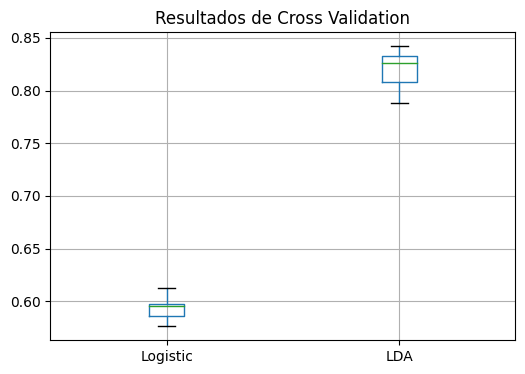

In [77]:
plt.figure(figsize = (6,4)) 
result_df = pd.DataFrame(results, index=names).T
result_df.boxplot()
plt.title("Resultados de Cross Validation");

El mejor clasificador es LDA

2) Crea un clasificador e indica su error. Úsalo para saber si lloverá en los próximos 3 días. Obtener
los datos de cualquier fuente de Internet indicando que día es. (1 punto)

Se procede a coger los nuevos datos

In [78]:
datos = pd.read_csv('seattle-weather.csv', encoding='UTF-8')
datos.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Se hace el preprocesamiento necesario

In [79]:
from datetime import datetime

datos['date'] = pd.to_datetime(datos['date'], format='%Y-%m-%d')

datos['date'] = datos['date'].dt.strftime("%d%m%Y").astype(int)

In [80]:
datos['weather'] = label_encoding.fit_transform(datos['weather'].astype(str))

In [81]:
datos.loc[(datos['weather'] == 2), 'LLUEVE'] = "Si"
datos.loc[(datos['weather'] != 2), 'LLUEVE'] = "No"
datos.head()

,date,precipitation,temp_max,temp_min,wind,weather,LLUEVE
0,1012012,0.0,12.8,5.0,4.7,0,No
1,2012012,10.9,10.6,2.8,4.5,2,Si
2,3012012,0.8,11.7,7.2,2.3,2,Si
3,4012012,20.3,12.2,5.6,4.7,2,Si
4,5012012,1.3,8.9,2.8,6.1,2,Si


In [82]:
datos['LLUEVE'] = label_encoding.fit_transform(datos['LLUEVE'].astype(str))
datos.head()

,date,precipitation,temp_max,temp_min,wind,weather,LLUEVE
0,1012012,0.0,12.8,5.0,4.7,0,0
1,2012012,10.9,10.6,2.8,4.5,2,1
2,3012012,0.8,11.7,7.2,2.3,2,1
3,4012012,20.3,12.2,5.6,4.7,2,1
4,5012012,1.3,8.9,2.8,6.1,2,1


Se muestran algunos datos relevantes, en este caso la media de los valores de las columnas más relevantes de este dataset

In [83]:
print("Media de la temperatura máxima:", datos['temp_max'].mean())
print("Media de la temperatura mínima:",datos['temp_min'].mean())
print("Media de la precipitación:",datos['precipitation'].mean())

Media de la temperatura máxima: 16.43908281998631
Media de la temperatura mínima: 8.234770704996578
Media de la precipitación: 3.02943189596167


Una vez tenemos todos los datos bien codificamos pasamos a predecir si va a llover o no

 en los próximos tres días con nuestro modelo que usa el clasificador LinearDiscriminantAnalysis que es el que mejor clasifica de todos

In [84]:
weather_data = datos

# Seleccionar las características relevantes para la predicción de la lluvia
X = weather_data[['temp_min', 'temp_max', 'precipitation']]

# Seleccionar la variable de destino (si llovió o no)
y = weather_data['LLUEVE']

# Crear un modelo de LDA
model = LinearDiscriminantAnalysis()

# Entrenar el modelo utilizando los datos históricos
model.fit(X, y)

# Preparar los datos meteorológicos para los próximos 3 días
new_weather_data = pd.DataFrame({'temp_min': [5, 8, 12],
                                 'temp_max': [30, 15, 20],
                                 'precipitation': [0.5, 7, 13]})

# Hacer predicciones sobre si lloverá o no en los próximos 3 días
predictions = model.predict(new_weather_data)

print(predictions)

[0 1 1]


En esta predicción nos sale que el primer día no llueve pero el segundo y el tercero si